In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [35]:
data = pd.read_excel('may.xlsx')

In [13]:
data.head()

,Date,Rms Sold,Rms To Sell,Occ,Arr Rms,Arr Res,SO Rms,Deprt Rms,Deprt Res,Cmp Rms,No Show Rms,Trans Rms
0,02/23/2023 Thu,146,4,97.333333,102,101,44,43,42,3,2,132
1,02/24/2023 Fri,140,10,93.333333,103,102,37,109,108,1,1,119
2,02/25/2023 Sat,140,10,93.333333,13,13,127,13,13,3,5,118
3,02/26/2023 Sun,79,14,52.666667,69,68,10,130,129,0,2,79
4,02/27/2023 Mon,105,33,70.000000,83,83,22,57,56,0,3,82


In [14]:
def splitdate(x):
    spli = x.split(" ")
    return spli[0]
data['Date'] = data['Date'].apply(splitdate)
# data.set_index('Date',inplace=True)

In [15]:
data.head()

,Date,Rms Sold,Rms To Sell,Occ,Arr Rms,Arr Res,SO Rms,Deprt Rms,Deprt Res,Cmp Rms,No Show Rms,Trans Rms
0,02/23/2023,146,4,97.333333,102,101,44,43,42,3,2,132
1,02/24/2023,140,10,93.333333,103,102,37,109,108,1,1,119
2,02/25/2023,140,10,93.333333,13,13,127,13,13,3,5,118
3,02/26/2023,79,14,52.666667,69,68,10,130,129,0,2,79
4,02/27/2023,105,33,70.000000,83,83,22,57,56,0,3,82


In [37]:
import datetime
datacol = data[['Date','Rms Sold']]
data['Date'] = pd.to_datetime(data['Date'])
datacol.set_index('Date',inplace=True)

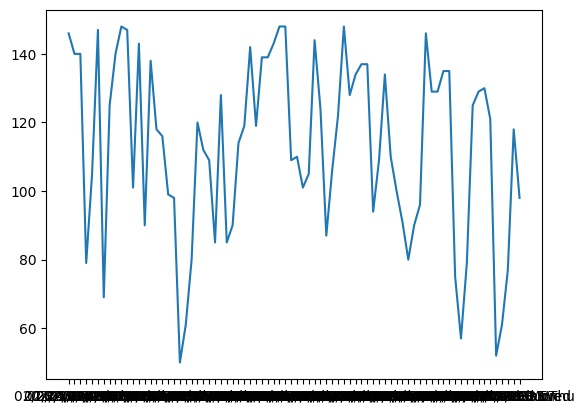

In [45]:
import matplotlib.pyplot as plt
x = data.index
y = data['Rms Sold']
plt.plot(x,y)

In [20]:
model = sm.tsa.ARIMA(datacol,order=(1,1,1))

c:\Users\GakuTokusumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\GakuTokusumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\GakuTokusumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [21]:
results = model.fit()

In [22]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               Rms Sold   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -356.333
Date:                Fri, 12 May 2023   AIC                            718.666
Time:                        13:32:13   BIC                            725.697
Sample:                    02-23-2023   HQIC                           721.478
                         - 05-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4267      0.142      3.010      0.003       0.149       0.705
ma.L1         -0.9996      6.115     -0.163      0.870     -12.985      10.985
sigma2       585.7768   3528.956      0.166      0.8

In [23]:
forecast = results.forecast(steps=10)

In [24]:
print(forecast)

2023-05-12    106.680418
2023-05-13    110.384314
2023-05-14    111.964749
2023-05-15    112.639114
2023-05-16    112.926862
2023-05-17    113.049643
2023-05-18    113.102034
2023-05-19    113.124388
2023-05-20    113.133927
2023-05-21    113.137997
Freq: D, Name: predicted_mean, dtype: float64


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

# Load the data into a pandas DataFrame object
data = datacol
# data.index = data.index.apply(datetime.datetime)
# Decompose the data into its components
# decomposition = sm.tsa.seasonal_decompose(data.index[0], model='additive')

# # Plot the decomposed data
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
# decomposition.observed.plot(ax=ax[0], legend=False)
# ax[0].set_ylabel('Observed')
# decomposition.trend.plot(ax=ax[1], legend=False)
# ax[1].set_ylabel('Trend')
# decomposition.seasonal.plot(ax=ax[2], legend=False)
# ax[2].set_ylabel('Seasonal')
# decomposition.resid.plot(ax=ax[3], legend=False)
# ax[3].set_ylabel('Residual')
# plt.tight_layout()

# # Detrend the data by subtracting the trend component
# detrended_data = data - decomposition.trend

# Test for stationarity using the Augmented Dickey-Fuller (ADF) test
result = sm.tsa.stattools.adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.689135
p-value: 0.000001
